In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model

# We specify the input shape so that weights are initialised

model = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Print the model summary

# Lets see the weights:

# model.weights (raw visualization of the weights)
# But instead we can see a nice summary:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 # We can also substitute the last the softmax activation function of the last dense layer
 # by a new Softmax layer.
 
 # And change the names of the layers

 model = Sequential([
    Flatten(input_shape= (28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu', name='layer_2'),
    Dense(10, name='layer_3'),  # Linear activation
    Softmax(name='layer_4')     # Then softmax to all.
])
 
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 layer_2 (Dense)             (None, 16)                272       
                                                                 
 layer_3 (Dense)             (None, 10)                170       
                                                                 
 layer_4 (Softmax)           (None, 10)                0         
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3,
           activation='relu',
           strides=1,
           padding='SAME',
           input_shape=(1,28,28),
           data_format='channels_first'), # data_format='channels_last' is the defualt one
    MaxPooling2D(pool_size=3,
                 strides=1,
                 data_format='channels_first'),
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
# Print the model summary

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 28, 28)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 26, 26)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                108170    
                                                                 
Total params: 108,330
Trainable params: 108,330
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # data labels are integers
                                            # if vectors: categorical_crossentropy
    metrics=['accuracy', 'mae']
)

In [ ]:
# Or we can be more succint and do it more carefully:
# Example
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy', # data labels are integers
                                            # if vectors: categorical_crossentropy
    metrics=[acc, mae]
)

In [ ]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)
# Even the learning rate
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Lets make sure we have the right model for classifying the
# Fashion-MNIST datasets

# Making model
model = Sequential ([
    Conv2D(24, kernel_size=3,
           activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling it
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.005),
    loss = 'sparse_categorical_crossentropy',
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(),
        tf.keras.metrics.MeanAbsoluteError()
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4056)              0         
                                                                 
 dense (Dense)               (None, 10)                40570     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 40,920
Trainable params: 40,920
Non-trainable params: 0
____________________________________________________

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data

# Check if it contains 60k images of 28x28:
print(train_images.shape)

# Lets see the labels:
print('Example label: ', train_labels[0])
print('Unique labels: ', np.unique(train_labels))

(60000, 28, 28)
Example label:  9
Unique labels:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Define the labels, from 0 to 9 according to the following:
# (That is why the 10 unit softmax output :O )

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1
# to be able to visualize

print('First label is: ', train_labels[0])
print('Which corresponds to: ', labels[train_labels[0]])

train_images = train_images/255.
test_images = test_images/255.

First label is:  9
Which corresponds to:  Ankle boot


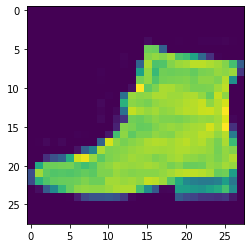

label: Ankle boot


In [ ]:
# Display one of the images

i = 30398
# the i-th images, all horiz. pixel and all vertical pixel
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}') 

#### Fit the model

In [ ]:
# Fit the model

# model.fit(train_images, train_labels,
#           epochs=2, batch_size=256)

In [ ]:
# We can do better by training it for 8 epochs and saving the object

history = model.fit(train_images, train_labels,
                    epochs=8, batch_size=256)

Epoch 1/8
235/235 [==============================] - 18s 77ms/step - loss: 0.2102 - sparse_categorical_accuracy: 0.9237 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 18s 77ms/step - loss: 0.1995 - sparse_categorical_accuracy: 0.9279 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 18s 77ms/step - loss: 0.1937 - sparse_categorical_accuracy: 0.9293 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 18s 77ms/step - loss: 0.1874 - sparse_categorical_accuracy: 0.9314 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 19s 82ms/step - loss: 0.1772 - sparse_categorical_accuracy: 0.9362 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 18s 77ms/step - loss: 0.1750 - sparse_categorical_accuracy: 0.9363 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 19s 82ms/step - loss: 0.1674 - sparse_categoric

#### Plot training history

In [ ]:
# Load the history (which is a dict) into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.210205,0.923667,4.420002
1,0.199544,0.927883,4.420001
2,0.193746,0.929283,4.419999
3,0.187410,0.931433,4.420001
4,0.177203,0.936233,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

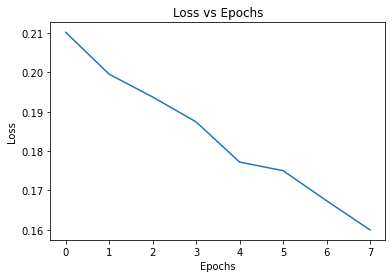

In [ ]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss vs Epochs',
                    legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

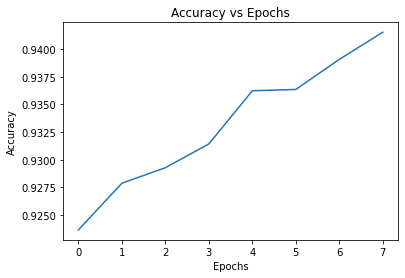

In [ ]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy',
                   title='Accuracy vs Epochs',
                   legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

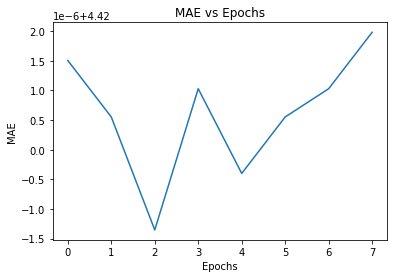

In [ ]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error',
                   title='MAE vs Epochs',
                   legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE')

Notice how the MAE stays constant.

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images, test_labels)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')
print(f'Test mae: {test_mae}')

313/313 [==============================] - 2s 7ms/step - loss: 0.3222 - sparse_categorical_accuracy: 0.9000 - mean_absolute_error: 4.4200
Test loss: 0.3222200274467468
Test accuracy: 0.8999999761581421
Test mae: 4.419997215270996


#### Make predictions from the model

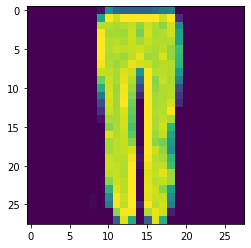

Label: Trouser


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis,...,np.newaxis])
print(prediction)
print(f'Model prediction: {labels[np.argmax(prediction)]}')

1/1 [==============================] - 0s 84ms/step
[[4.1136039e-10 9.9999988e-01 1.6280589e-15 3.0143249e-12 1.1328503e-07
  1.6450823e-09 2.9415037e-10 5.4270639e-23 2.2212822e-14 3.0048508e-10]]
Model prediction: Trouser


Woo!! Nice prediction and evaluation of performance!

# Extra: can you predict the label of a batch of images simulatneously?

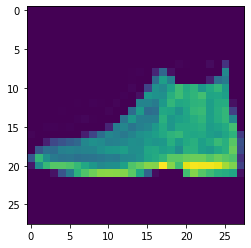

Label: Ankle boot


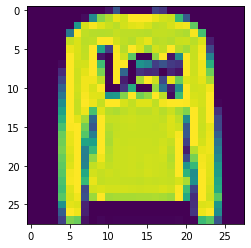

Label: Pullover


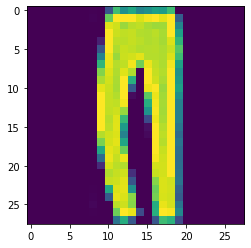

Label: Trouser


In [ ]:
test_images2 = test_images[0:3]
for i in range(3):
  plt.imshow(test_images2[i])
  plt.show()
  print(f"Label: {labels[test_labels[i]]}")

In [ ]:
for j in range(len(test_images2)):
  # you 
  prediction = model.predict(test_images2[j][np.newaxis,...,np.newaxis])
  print(prediction)
  print(f'Model prediction: {labels[np.argmax(prediction)]}')

1/1 [==============================] - 0s 18ms/step
[[1.4258078e-09 8.5398140e-17 5.6726130e-12 1.2961276e-12 3.7563724e-10
  8.1404090e-05 1.7354845e-06 1.9749368e-02 6.0036136e-11 9.8016751e-01]]
Model prediction: Ankle boot
1/1 [==============================] - 0s 17ms/step
[[1.2343178e-04 1.1756419e-15 9.9883968e-01 3.1115434e-08 1.0216974e-03
  2.4810559e-19 1.5233076e-05 2.8247066e-16 9.8963203e-14 9.1642292e-30]]
Model prediction: Pullover
1/1 [==============================] - 0s 17ms/step
[[2.0668043e-09 9.9999869e-01 5.0770203e-14 7.8807914e-16 1.6460359e-11
  1.2841423e-06 6.7047512e-13 4.6229187e-25 1.2417758e-10 1.0017440e-14]]
Model prediction: Trouser


Or you could use the method ```predict_on_batch```

In [ ]:
batch_predict = model.predict_on_batch(test_images2)
print(batch_predict)
for i in range(len(batch_predict)):
  print(f'Model prediction: {labels[np.argmax(batch_predict[i])]}')

[[1.4258024e-09 8.5397809e-17 5.6725696e-12 1.2961227e-12 3.7563580e-10
  8.1403850e-05 1.7354812e-06 1.9749328e-02 6.0036011e-11 9.8016751e-01]
 [1.2343166e-04 1.1756508e-15 9.9883968e-01 3.1115494e-08 1.0217023e-03
  2.4810843e-19 1.5233061e-05 2.8247281e-16 9.8964334e-14 9.1642292e-30]
 [2.0668043e-09 9.9999869e-01 5.0770010e-14 7.8807914e-16 1.6460330e-11
  1.2841423e-06 6.7047518e-13 4.6229537e-25 1.2417782e-10 1.0017478e-14]]
Model prediction: Ankle boot
Model prediction: Pullover
Model prediction: Trouser
